# Sentiment Analysis Naive Bayes Algorithm with 75% Accuracy by Novan Surya Putra

# Mobil Listrik??? BAGUS GA SIII?
### Sentimen analisis pada mobil listrik di indonesia, analisis ini mengarah pada bagaimana tanggapan masyarakat indonesia terhadap mobil listrik dan sebagai insight bisnis dalam bidang otomotif.
Dalam era transformasi menuju mobilitas yang lebih berkelanjutan, analisis sentimen menggunakan teknologi machine learning menjadi alat penting dalam memahami pandangan masyarakat terhadap mobil listrik di Indonesia. Dengan mengumpulkan dan menganalisis data dari berbagai sumber seperti media sosial, ulasan online, dan survei, teknologi ini memungkinkan kita untuk mengidentifikasi tren, kekhawatiran, dan harapan yang mungkin dimiliki oleh masyarakat terkait adopsi mobil listrik. Informasi ini tidak hanya membantu produsen dan penyedia layanan dalam merancang produk yang lebih sesuai dengan kebutuhan pasar, tetapi juga mendukung pengambilan keputusan pemerintah dalam merancang kebijakan yang mendukung pertumbuhan dan adopsi mobil listrik di Indonesia.

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS

In [58]:
data = pd.read_csv('mobil_listrik.csv')

In [59]:
data.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


In [61]:
data.shape

(1517, 5)

In [62]:
data.isnull().sum()

id_komentar      0
nama_akun        1
tanggal          0
text_cleaning    2
sentimen         0
dtype: int64

In [63]:
data = data.dropna()

In [64]:
data.isnull().sum()

id_komentar      0
nama_akun        0
tanggal          0
text_cleaning    0
sentimen         0
dtype: int64

In [65]:
data.duplicated().sum()

0

In [66]:
data.describe()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
count,1514,1514,1514,1514,1514
unique,1514,1513,1511,1513,3
top,Ugzbll5eyrIy3-gdUUJ4AaABAg,Albert,2023-06-06 14:02:09+00:00,mahal,negatif
freq,1,2,2,2,868


# Data Processing

In [67]:
data = data.drop(columns='id_komentar')

In [68]:
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [69]:
data['text_cleaning'] = data['text_cleaning'].str.lower()

# Normalisasi

In [70]:

norm= {"gw": "saya",
    "gue": "saya",
    "lu": "kamu",
    "gua": "saya",
    "gw": "saya",
    "gue": "saya",
    "elo": "kamu",
    "lu": "kamu",
    "l": "kamu",
    "gw": "saya",
    "gue": "saya",
    "gue": "saya",
    "gua": "saya",
    "gw": "saya",
    "gw": "saya",
    "gue": "saya",
    "g": "tidak setuju",
    "ga": "tidak setuju",
    "ngga": "tidak setuju",
    "nggak": "tidak setuju",
    "ga": "tidak setuju",
    "nggak": "tidak setuju",
    "ngga": "tidak setuju",
    "tp": "tetapi",
    "tapi": "tetapi",
    "tpi": "tetapi",
    "tp": "tetapi",
    "tpi": "tetapi",
    "tapi": "tetapi",
    "y": "setuju",
    "yup": "setuju",
    "yoi": "setuju",
    "ok": "setuju",
    "oke": "setuju",
    "ok": "setuju",
    "ya": "setuju",
    "sipp": "setuju",
    "sip": "setuju",
    "sama": "dengan",
    "sm": "dengan",
    "smbil": "sambil",
    "bs": "bisa",
    "bisa": "bisa",
    "br": "baru",
    "baru": "baru",
    "bb": "badan berat",
    "bb": "badan berat",
    "dr": "dari",
    "drpd": "daripada",
    "drpd": "daripada",
    "dari pada": "daripada",
    "tdk": "tidak setuju",
    "tdk": "tidak setuju",
    "kalo": "kalau",
    "kl": "kalau",
    "klo": "kalau",
    "klu": "kalau",
    "kluar": "keluar",
    "bgt": "banget",
    "bgd": "banget",
    "banget": "banget",
    "smua": "semua",
    "smw": "semua",
    "semua": "semua",
    "dgn": "dengan",
    "dengan": "dengan",
    "kaya": "seperti",
    "ky": "seperti",
    "kayak": "seperti",
    "kayanya": "sepertinya",
    "kk": "kak",
    "kakak": "kak",
    "c": "ce",
    "ce": "ce",
    "cowo": "cowok",
    "cowok": "cowok",
    "tmn": "teman",
    "teman": "teman",
    "bkn": "bukan",
    "bkn": "bukan",
    "tuh": "itu",
    "itu": "itu",
    "gue": "saya",
    "lo": "kamu",
    "kmu": "kamu",
    "km": "kamu",
    "kmu": "kamu",
    "gw": "saya",
    "gue": "saya",
    "lo": "kamu",
    "dri": "dari",
    "m": "saya",
    "sklh": "sekolah",
    "skl": "sekolah",
    "sklh": "sekolah",
    "skli": "sekali",
    "smp": "sampai",
    "drpd": "daripada",
    "drpd": "daripada",
    "kpd": "kepada",
    "kpd": "kepada",
    "klg": "keluarga",
    "klg": "keluarga",
    "klrg": "keluarga",
    "smpe": "sampai",
    "smpe": "sampai",
    "smpe": "sampai",
    "mgkn": "mungkin",
    "mgkn": "mungkin",
    "mgkin": "mungkin"
}

def normalisasi(str_text):
    for i in norm :
        str_text = str_text.replace(i,norm [i])
        return str_text
data['text_cleaning']= data['text_cleaning'].apply(lambda x: normalisasi (x))

# stopword

In [71]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_Remover_new.remover(str_text)
    return str_text

data['text_cleaning']= data['text_cleaning'].apply(lambda x: normalisasi (x))
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


# Tokenisasi 

In [72]:
tokenized = data['text_cleaning'].apply(lambda x:x.split())
tokenized

0       [saran, sih, bikin, harga, ionic, sama, kayak,...
1       [problem, subsidi, kualitas, diturunin, harga,...
2       [baik, kualitas, kembang, dulu, baik, kualitas...
3       [model, jelek, kwalitas, buruk, harga, mahal, ...
4       [syarat, ngaco, woy, anak, muda, blom, punya, ...
                              ...                        
1512    [apa, kabar, padahal, negri, luar, biasa, dapa...
1513    [antar, anak, sekolah, antar, bantu, pasar, kl...
1514                               [esemka, bangga, solo]
1515    [cerdas, orang, hny, dn, pasar, itu, jln, x, b...
1516    [niat, beli, ev, murah, malah, ikut, dinaikin,...
Name: text_cleaning, Length: 1514, dtype: object

# Steaming

In [73]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = ' '.join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv ('Mobilbersih.csv', index=False)
data_clean = pd.read_csv('Mobilbersih.csv')

saran sih bikin harga ionic sama kayak brio insya alloh laris manis
problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede
baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang
model jelek kwalitas buruk harga mahal croot
syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha
harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi
mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas
proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru

nyata muldoko kosong
masyarakat tengah bawah mikir sih beli biaya rumah berapa sanggup ampere rumah masa iya pas charge cabut kulkas alat rumah lain dulu lama waktu charging kursi sedikit harga mahal yah mending produk dulu bengkel semua kota hitung harga jual semua kota punya station charge jalan indo banyak terjal lubang sanggup mungkin jalan kota desa desa jalan jelek gimana
tesla malaysia launching bilang tak laku benar makin banyak malaysia singapore
mau orang langsung pindah tutup subsidi bbm subsidi
sekarang bagus si perintah langkah lebih sedikit sedikit
laku masyarakat ganggu produsen mikir ogah
mending bensin hitung ama keluar mahal
jelas market mau high end laku kayak avanza mana mau laku keras low end harga avanza segmen masyarakat low end harga high end capai
bingung sama perintah indonesia kalian pimpin rakyat indonesia karyawan usaha asing sih ngapain ngasih subsidi produk usaha asing lebih prioritas dapat subsidi perintah indonesia produk usaha lokal asli indonesia buka

mau banget ganti ev mau wuling merek lebih established skema gampang wuling ev harga jt jadi standar perintah subsidi toyota bzx honda prologue hyundai ioniq harga sumpah bakal banyak ganti ev
moeldoko sabda usaha isu khusus dealer isu apabila p mau beli kendara skema jalan restitusi susah mau ngmng
rakyat mau muraah dicharge rumah kantor
perintah latah gas ikut bbg ikut esok baru hidrogen ikut hidrogen padahal infrastruktur isi ulang charge bbg stsiun minim dasar mental followers
harga ev mahal solusi perintah suruh guna non ev bayar mau pakai jalan ev wuling harga avanza mana punya size lebih besar fitur lebih banyak masuk akal pilih wuling hyundai ioniq harga pajero harga hybrid murah guna jalan bayar lalu pajak guna non ev bayar
subsidi tepat kena orang duit kena orang miskin butuh duit usah niru negara maju negara barat banyak mampu beli
design kurang garang ganteng hampir kaya hai tayo isi dikit
bikin kelas avanza expander harga sama jtan banyak alih besar airev harga an banyak t

bagaimana nasib kendara bahan bakar gas dulu gembor
subsidi trik marketing
teknologi baru familier teknologi bahan bakar tarik konsumen lebih cepat isi
harga terlalu mahal paling egk harga lcgc baru laris
orang indonesia butuh daya angkut banyak bawa hasil kampung kijang stasiun cas banyak
judul jelas tengah begok rakyat mau narasumber moeldoko gaikindo jelas usaha moblisnya sendiri tanya rakyat sendiri
bikin ekosistem butuh pokok cipta mandiri bukan import ekonomi rakyat naik apa beli n jalan otomatis sayang khayal belaka
kendara benar lebih simple kata fre maintenance spt diesel gasoline drive vehicle bicara ev bukan masalah effisien kwh km vs ltr km msh more or les gantung kendaraanya bicara electric vehicle kait energy bersih zero emisi urgency milik masyarakat indonesia negara kembang harga ev sangat mahal banding kendara konvensional perlu difikirkan perintah mesti konsep transform angkut masal perlu prioritas dg ev tuju dg ide anies kait bijak beri subsidi tax reduksi ev sgt gam

beli tengah atas banyak masyarakat tengah bawah motor dealernya terasebar kota besar daerah mungkin difikirkan beli
melunjak pln diam tempat bakal naik naik naik menrurut sering naik biaya
sekarang minat tak laku indonesia pangku tangan luar negeri merencanakal besar ubah energi baru kendara bbm kendara sangat mungkin bila rakyat indonesia tiba giur buat asing tsb isu kaji dalam
kendara cuma penting jabat hayo siapa milik saham baterai
beli toyota transmover
lapang tempat charging jarang mana masyarakat mau
tri tambah kaya bkn rakyat
lebih baik bau laku transportasi umum tanggung perintah wilayah kota
model kok aneh sedap pandang haha janat beli kok maksa rakyat beli
mau laku mobol utama muldoko jual semua kenderaanmu ganti dg berbahab bakar jokowi tri lain baru contoh bukan munafiq aamiin
duga brg ggk akn laku ngapain orang pake ribet bbm gampag beli kecuali bbm sudh lagka
ev bom layak sekarang segi harga peroformanya jauh mending push bahan bakar biofuel bahan bakar tumbuh baru fokus

jelas mahal charging lama jelajah pendek dpminan no
perlu subsidi tiket kai
lama video buat inti kendraan bensin lebih murah harga beli
pindah polusi udara kota pindah kawasan pltu hasil polusi lebih parah makin besar guna ev makin besar minta daya makin banyak batubara bakar
bagaimana laku lebih cuma irit irit sangat giur kaum ekonomi bawah ironis kendara hargae atas jt bahkan milyar nyata punya uanga atas juta bahkan milyar terlalu pikir irit pikir gengsi status kaya mana mungkim mau
bantu pajak kokuntuk menuhin jalan raya bikin macet kocag transportasi umum banyakin aduh ampun investor akal sehat ilang
anggap beli cashnya habis tengah jalang terus mau ngisi cashnya numpang rumah orang mana tinggal desa
jangan terlalu ekor luar negeri hidup akan dikte luar buat atur sengsara rakyat pln bangun mahal mau pensiun dini beli mahal pajak mahal mau batas jalan ganjil genap pajak progressif terus mau apa
beli harga tinggi dulu kira juta lebih baik beli avanza bekas harga juta
akar masalah mu

maslahnya kalah saing sama bbm subsidi
pabrik bahan minyak terus produksi blm sedia segala perlu butuh sebut mudah jangan harap laku masyarakat
jujur sangat bahaya buat guna jalan kaki kadang mau belok hampir ktabrak karna kendara listik suara
tau apa muldogdog tau mo rebut demokrat doank anis gagal nyampres
rakyat kok bisnisin
laku obral
inti waktu cas jarak tempuh
colok rumah naikin daya
utang kalian semua utak udang percuma kalian parlemen ngurus negara tak becus isi utak kalian korup tak darinitu alas jah gera rak yat luhut moldoko kalian dua tak sengaja meng hancur bang sa
mau fokus kendara fokus dulu bangun tempat cas banyak titik contoh spbu rest area rumah makan dl
wacana media harga murah rame beli
butuh motor fast charging charge menit jarak km harga jt garansi baterai th kaya gitu rasa bakal rame alih
ini bijak modus infrastructure mbl blum malah ksh subsidi beli mbl orang kaya kok subsidi blm tagih naik untung usaha jg kuasa
harga mahal kecil ev
bakal laku soal batrainya ma

tak laku kok tempat wara wiri terus motor sama
coba jt rame beli malah lebih mahal bensin apa gila dg segala kurang kok minta harga mahal perintah bodoh sih turut
kata masa depan tpi keluarin masa sekarng gmna mau laku
papa tahun lalu jg handphone jg laku sekarang tani desa main tik tok an inti tunggu waktu
bukan masalah harga ntar mati jalan solusi gimana bensin warung jual ecer
tar jln satu kendara laku naikin harga bbm pertalite hilang subsidi
mau turunin pajak masuk indo malaysia harga motor juta tukar uang indo indo harga motor juta logic indo
ev nd car st car mikir hrg tara muat orang
dulu minyak tanah tabung gas ribut lama lama sedia mesti alih
bukan bajaj
tiap tahun sekali ganti baterai tekor
murah harga motor subsidi baru masuk akal
prasarana ribet mau beli
inti ngecas bikin bingung rumah mau naikin brp ribu wat charging
sesuai biasa lama biasa baru perlu waktu adaptasi wajar normal
buka tak laku tak cari buat dapur makin susah motor beli second pribadi
lhah pasar tentu knp mu

makan susah apalgi mau beli mank hrga murah
mending subsidi transportasi publik bangun transportasi umum bikin macet
perintah fokus jual motor lupa transportasi umum jalan tambah macet boros ruas jalan akibat bbm buang jalan
banyak pakai batrei semua rata soak durasi pakai batas
atur subsidi motor sangat lucu dapat subsidi buat orang miskin pernah mrnerima sedang terima bantu perintah subsidi laku orang pernah terima bantu perintah makanya laku untung pabrik rakit motor negara china
rakyat miskin mampu beli mikir mikir
kta demokrat punya moel
ikut tambah mungkin perlu pantau perihal coba terap kendara umum lebih coba kenal dini masyarakat luas perlu tambah sistem dingin efisien baterai tanggulang suhu panas pakai suhu panas el nino sistem dingin baterai sangat pasti ledak perlu tambah ruang simpan baterai aman banjir hasil hujan deras tahan daya bentur keras tanjak perlu teliti internal upgrade tingkat daya simpan baterai tuju konsumen puas lama daya pakai baterai akhir lama masalah ba

rakyat mau merek kenal honda suzuki jelasx baik merek baru siapa mau beli mau motor terbang blm
pribadi subsidi aneh
model kurang tarik coba robah model bikin kya avanza
esempak makin terbang langit be like it produkpolitik
rakyat mau iritbbm ltr km ltr pajak murah sparepart limpah muat bnyak
elon mask udh menjangkakn
paksa rakyat kecil nama paksa hendak rakyat korban penting investor aseng
tiket kereta murah lebih enak naik kereta perlu usaha kemudi maklum sanggup bayar driver
luhut muldoko fikirin bangkrut
kendara blunder
spbu tambah fasilitas buat charging usa mikir lahan tinggal instalasi
laku kota besar karna daya mengeces kendara blum sluruhnya indonesia pom daya jangkau beli jangkau kalang tengah bawah
bingung ngecasnya bos
jangan mau beli bayar ngos ngosan
siapa mau beli mahal ujub duit nyetak
infrastruktur charger minim
kendara umum utama masyarakat mampu suruh beli penting didik anak generasi muda kuasa iptek
indah dulu sering kendara naik kereta kuda
ev praktis luar kota mau

fasilitas banyak blm dukung alasanya
memang perlu kendara pribadi properti krusial harga relatif mahal bahan bakar subsidi jelas buang buang kas negara negara maju pedestrian pada orang orang cukup jalan kaki naik transport umum guna alternatif murah lain cukup penuh perlu lokasi ingin
sebab karna kurang paham masyarakat lebih ev cuma mikir ev bebas karbon paham lebih contoh a ev kuat nanjak mohon maaf ev rata rata torsi mesin besar torsi pakai tanjak bukan daya kuda hp b ev sedia orderdil jarang ev hampir bilang fre maintenance karna gerak pakai dinamo ada pernah servis bulan kipas angin ganti oli kipas angin tiap bulan ev susah kalaupun ganti biasa baterai itu jangka waktu lama sisa komponen umum misal ganti ban kampas rem jual sedia c harga charging ev mahal banyak bahas ngetes boros boros ev lebih irit combustion engine jarak jelajah ev pendek jarak jelajah ev uang sanggup bayar ev sanggup km sekali jelajah masalah sanggup beli inti tanya tanya gambar paham masyarakat ev bagus harg

bentuk krna baru kalem insyallah
harga batre sangat mahal ng sistim tukar batre khawatir habis jalan bengkel blm rata
indonesia mau bagus murah fitur banyak coba bikin jt an bawah laku keras
ingin masyarakat to bbm sembako murah bukan kendara banyak kyk mn macet total
wajar inovasi ubah fase paling susah terima ubah tsb iring waktu terima sendiri iring kembang sarana prasarana policy
coba kendara umum dulu digati kendaran lisrik bus dl
andai carger pake powerbank mungkin minat
benerin jalan dlu baru transportasi jalan ancur ancur
jelek mahal siapa mau
kendara bentuk design aneh cocok buat selera indonesia
cocok daerah gunung penuh hutan takut mogok kuat nanjak
tak mampu beli
paksa kendara perut rakyat banyak lapar harus perut dulu penuh baru kendara pikir sederhana roket
kurang laku negara kembang negara maju banyak minat
biaya mahal blm biaya pasang ev charging rumah mahal station isi daya jg blm banyak lebih baik perintah utama kendara angkut umum dulu banyak angkut umum lebih utama


tuju buat apa sih ngurangin emisi khawatir minyak bumi fossil habis bukan emisi cuman pindah kenalpot bangkit bukti bangkit kerja lebih keras cas baterenya batubara tetap guna bangkit tenaga uap minyak bumi fossil tetap guna hidup bangkit tenaga diesel trus buat apa emisi tetap hilang cuman pindah tempat
manja cuma buat belnja pasar alfa indomart anter anak sekolah anter mamah arisan nongki senayan dar buat pamer y a masalah masyrkt kecil buat angkut sana angkut sini jarak tempuh jauh kuat nanjak bawa rombong jamah jamah
lebih penting urus perut n biaya sekolah
nge cas rumah weh parkir jalan diselimutin punya punya garasi kok mau sok
jala mulusin dlu desa sulit buat wara wiri jala rusak
entar diskon diskon lalu banyak minat terus tahun depan gas harga kayak gas elpiji dulu gas elpiji tabung ijo iming iming murah kandung gas elpiji limpah ujung perintah cuma buat bisnis bukan sejahtera rakyat perintah kok hitung itungan sama rakyat parah nama perintah sejahtera rakyat bukan anggota peri

batere ganti tiap tahun harga batre ratus juta sulit masyarakat terima
durung wayahe mikir kendara bosque
lama harga bensin jangkau jangan harap laku
harga stngh harga pasar garansi batrai minimal tahun blh pikir luar negri harga harga indonesia bandingin hyundai ioniq korea beda x lipet banding indonesia pdhal hyundai pny pabrik indonesia ngapain bangun indonesia tekan harga domestik trs jg naik trs sama boong hemat bbm harga naik
tri sama perintah ajah pake kendara ngapain rakyat suruh pake pikir bikin bijak jangan blunder benar buat bijak tolak
sebentar buming
harga jt gada worth it baru oke masalah moga pihak asing mau buka pabrik baterai indonesia lebih murah
mau laku bebasin pajak kendara rp semua orang pindah kendara
yakin sistem swab mungkin laku motor subsidi mana sulit e pol mudah donk kasih subsidi banyak mol bawah jt jangan atas malah kasih subsidi banyak orang beli jt kok kasih subsidi justru jt bawah malah cuman sd jt subsidi kasih subsidi banyak bawah jt beli banyak
seka

apa apa order online rakyat cuma butuh rumah murah kuota internet murah smartphone murah
daerah sih mau chas kadang cas rumah banyak kuat daya
mending beli kuda gratis bbm rumput minim awat tua tinggal sembelih daging makan bermafaat
perintah usaha koplaknya beri subsidi untung sendiri sangat miris
subsidi ngaco masuk kantong usaha ini negeri koruptor negeri surga cukong
banyak jual fb marketplace olx aplikasi bisnis jualbeli otomotif harga turun sedikit mungkin cocok masyarat guna alas kendala rakyat kismin boro boro punya motor lebihbaik naik angkot bis grab gojek keretalistrik rakyat tengah nama lika liku punya gunakn beli kredit maupun cash paksa jual ketidakcocokan rakyat tengah atas sorry bukan sombong biasa dulu udh lebihsuka mewah mercedesbenz bmw maupun sport mewah lamborghini ferrari biasa koleksi garasi maklum hobi otomotif banyak kurang minat mending beli bahanbakar lama pake tahun tahun bahkan jual
coment hebat boong frank sma cnbc
penting bapak bapak cuan besar feeling ba

usaha pinter ajar minyak goreng sekarang bayar cchuuaks
kek mas harga sih serih sih lihat wuling padahal tempat desa
harga sm bbm splu byk
sama bohong kurang ppn pajak barang mewah tetap
stop jual stop jual motor dorong kendara umum banyak baru pikir akal sehat
cashnya lama jam apa lgi subsidi jelas
subsidi harga mahal tempat charger charger rumah voltase kuat
dagel jabat konoha
model kurang tarik
harga muahal apa secondnya masyarakat lirik bensin tempat isi batas forma tinggi tahan batre jarak jelajah jauh jadi prioritas
masalah ekosistem bentuk mau laku investasi gede daerah desa bikin swap battery spbu minimal fast charging spbu awal bentuk kelompok masyarakat pakai ev terus kembang j cuma ngemeng mana laku investor kabur
pindah haluan pake duit gp la semua biaya padahal mampu ekonomi jd kwndala bnyak kutat mas ekonomi blm bla bla bla
coba cnbc cek jual no dunia tahun apa
orang beli punya hak pilih jangan buat atur arah paksa
chargernya susah
th depan info batrey secondnan gan
ingin

tenang semua butuh proses alih ev waktu mungkin butuh waktu tahun budaya manusia mmg alih ev harga ev mulai jangkau tekhnologi ev matang
baik kualitas baterai isi service suku cadang pulau jawa garansi baterai kurang th uji tes jalan gunung banyak mekanik
kendara sekarang sedia mobilitas kota fasilitas isi blm rata trus banyak lemah banding kendara petrol
lama bensin sedia warga konoha gal bakal mau alih coba bensin mahal hilang pasar langsung alih motor
fasilitas tak rata mau gimana subsidi banyak minat swap charging station langka bikin ragu subsidi fasilitator milik spbu supemarket hotel dk mau pasang swap charging station kontra subsidi orang mampu jg kurang ragu warga mau beli
nunggu kabel charger type c
susah ngisi ulang ces batre
maaf bos ku mau nanya nih lewat jalan banjir sampe tenggelam paruh apa konslet maaf orang kebun tau bos
insentif apa kasih produsen cuma pajek ntar revisi abis laris manis
gmana mw laku orang indonesia punya budaya parkir jalan walaupun drmh parkir prib

ttep mahal nikmat main motor sendiri langsung terima untung subsidi ikan perintah model subsidi ikan bukan konsumen masyarakat lebih main motor perintah produsen kemudian ecer kemudian masyarakat akhir dapet doank bla bla bla harga ttep mahal lucu
luhut curiga
nik sih sama sama arti keluarga subsidi lebih sekali
betul subsidi jt plat trus mau pake plat bayar juta sama
subsidi roda orang kaya mana tepat sasar
gila sedikit sama bohong
teknis beli bagaimana online soal blm banyak dealer daerah
apa bau itu
mikir begini mbok kolaborasi usaha indonesia buka lapang kerja lebih baik kasi negeri mas banyak generasi prestasi kurang untung sebenernya layak kerja dpt kerja coba fokus minim tahun mikiri lapang kerja lebih manfaat mikiri subsidi kendara sebenernya jg signifikan
keluarin harga lcgc perlu sebut subsidi sila bisik perintah produsen kendara
dealer kendara rata seluruh indonesia
kendaran buat negeri
akal akal cara korupsi
dapet insentif pajak dimahalin perintah
ahli sekarang sbg transisi

In [109]:
data_clean.head()

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,1
1,problem subsidi kualitas diturunin harga dinai...,0
2,baik kualitas kembang dulu baik kualitas motor...,1
3,model jelek kwalitas buruk harga mahal croot,0
4,syarat ngaco woy anak muda blom punya rumah bl...,0


In [110]:
at1 = pd.read_csv("Mobilbersih.csv")
at2 = pd.read_csv("Mobil_listrik.csv")
att2 = at2['sentimen']

data_clean = pd.concat([at1, att2], axis=1)
data_clean

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kwalitas buruk harga mahal croot,negatif
4,syarat ngaco woy anak muda blom punya rumah bl...,negatif
...,...,...
1512,cerdas orang hny dn pasar itu jln x blom da gi...,negatif
1513,niat beli ev murah malah ikut dinaikin sama pe...,negatif
1514,NaN,positif
1515,NaN,netral


In [111]:
data_clean = data_clean.dropna()

In [112]:
data_clean = data_clean[data_clean['sentimen'] != 'netral']
data_clean

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kwalitas buruk harga mahal croot,negatif
4,syarat ngaco woy anak muda blom punya rumah bl...,negatif
...,...,...
1509,apa kabar padahal negri luar biasa dapat negara,negatif
1510,antar anak sekolah antar bantu pasar klw jauh ...,positif
1511,esemka bangga solo,positif
1512,cerdas orang hny dn pasar itu jln x blom da gi...,negatif


In [113]:
data_clean = data_clean.replace ({'positif' :1, 'negatif':0})

In [114]:
data_clean.head()

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,1
1,problem subsidi kualitas diturunin harga dinai...,0
2,baik kualitas kembang dulu baik kualitas motor...,1
3,model jelek kwalitas buruk harga mahal croot,0
4,syarat ngaco woy anak muda blom punya rumah bl...,0


# Visualisasi

In [115]:
data_negatif = data_clean[data_clean['sentimen'] ==0]
data_positif = data_clean[data_clean['sentimen'] ==1]

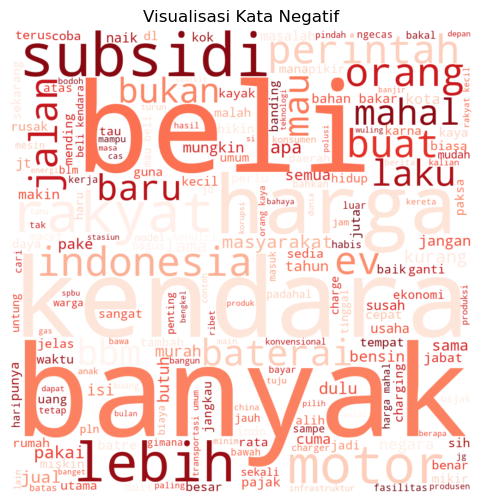

In [116]:
all_text = ' '.join(word for word in data_negatif['text_cleaning'])

# Membuat objek WordCloud dengan konfigurasi yang diinginkan
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

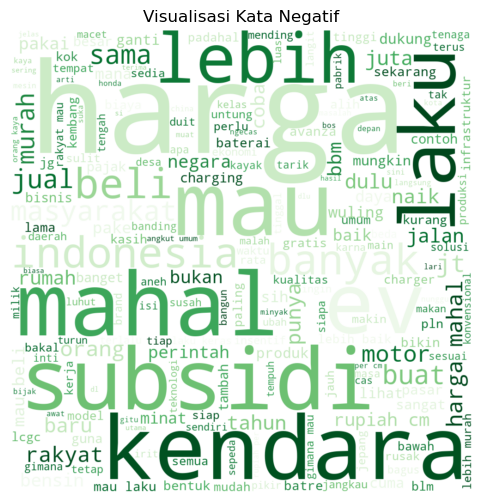

In [117]:
all_text = ' '.join(word for word in data_positif['text_cleaning'])

# Membuat objek WordCloud dengan konfigurasi yang diinginkan
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

In [118]:
data_clean['sentimen'].value_counts()

0    868
1    503
Name: sentimen, dtype: int64

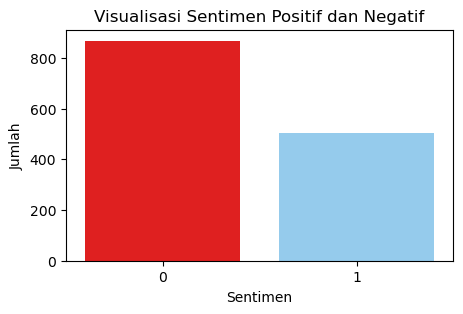

In [119]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='sentimen', palette={0: "red", 1: "lightskyblue"})
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Data Preparation

In [120]:
x = data_clean['text_cleaning']
y = data_clean['sentimen']
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size =0.2, random_state=42)

In [121]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [122]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)

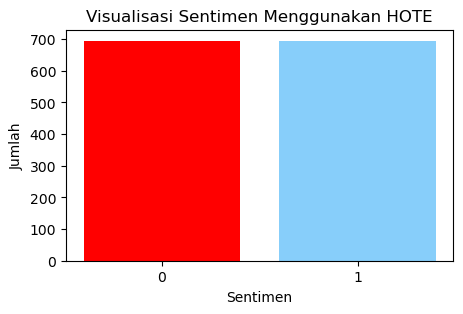

In [123]:
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan HOTE')
plt.xticks(sentimen_counts.index, ['0', '1'])

plt.show()

# Model

In [124]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [125]:
y_pred = naive_bayes.predict(x_test_vec)

In [126]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print('Akurasi Model Naive Bayes : ', accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7563636363636363

Laporan Klasifikasi :
               precision    recall  f1-score   support

     negatif       0.77      0.87      0.82       173
     positif       0.72      0.56      0.63       102

    accuracy                           0.76       275
   macro avg       0.75      0.72      0.72       275
weighted avg       0.75      0.76      0.75       275



In [127]:
# Testing Model

In [129]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentiment_label = "positif"
elif predicted_sentimen[0] == 0:
    sentiment_label = "negatif"
print('Hasil Analisis Sentiman:', sentiment_label)



Masukkan teks baru: bagus banget mobil listrik di indonesia
Hasil Analisis Sentiman: positif


In [97]:
import pickle
from sklearn.naive_bayes import MultinomialNB
# Creating and training the linear regression model
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

# Saving the model using pickle
filename = "Sentiment.sav"
with open(filename, 'wb') as file:
    pickle.dump(naive_bayes, file)